# Comparing Different Search Strategies: Maze


Notes on breaking ties: 

* The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
* Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.

Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (np.int64(8), np.int64(1)).


<Figure size 640x480 with 0 Axes>

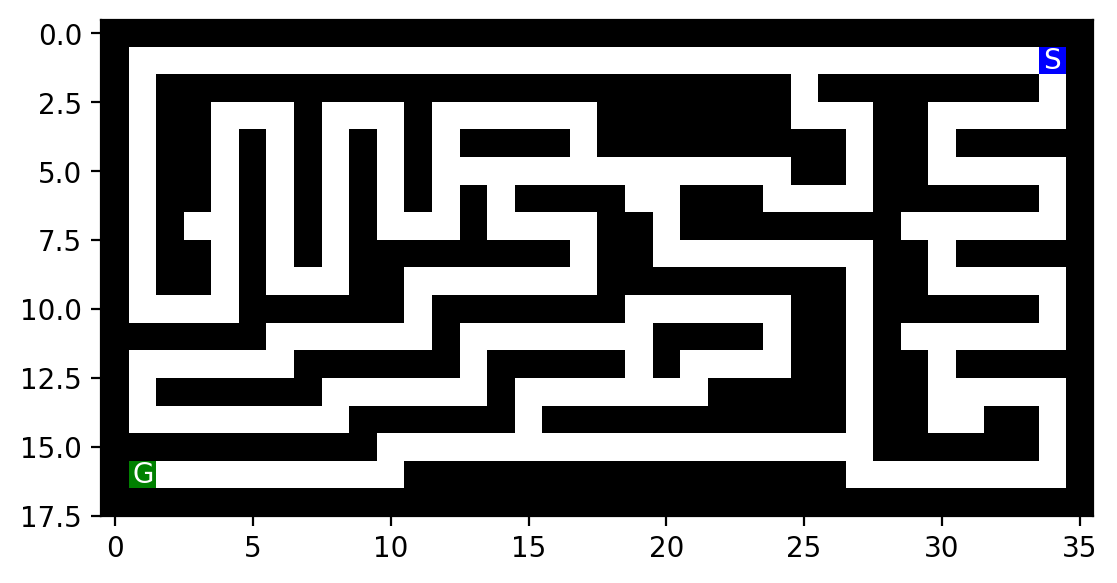

In [16]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

#f = open("small_maze.txt", "r")
f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_maze_2.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

show_maze(maze)

My implementation follows the pseudo code from the slides/textbook.

In [17]:
# tree_search_solution.py has my actual implementation (not published)
import tree_search_solution as ts


# order in which we add new states to the frontier
ts.set_order("NESW")
#ts.set_order(random=True)

Directions are checked in the order ['N', 'E', 'S', 'W']


## Experiments - Uninformed Search

### BFS

In [18]:
ts.set_order("NESW")
#ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "BFS", animation = True)
ts.animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 30.4 ms, sys: 4.1 ms, total: 34.5 ms
Wall time: 31.9 ms
Path length: 68
Reached squares: 269
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


### DFS 

This implementation uses not reached data structure and has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

We need to check for all cycles. If we do not break all cycles correctly, then we will end up in an infinite loop. Here are possible solutions:
* Stop after a fixed number of tries and return no solution `max_tries`.
* IDS solves this problem.

Note on the visualization: I use gray for areas that the algorithm has explored, but DFS has already removed it from memory!

In [19]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not string enough! 
# I use a maximum number of tries and stop if the goal is not reached.
ts.set_order("NESW")

%time result = ts.DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)
## Experiments - Uninformed Searchts.animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 22.4 ms, sys: 83 μs, total: 22.5 ms
Wall time: 21.3 ms


## Experiments - Informed Search

### Greedy Best-First Search (GBFS)

In [20]:
# set the heuristic to Manhattan distance
ts.heuristic = ts.manhattan

In [21]:
ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "GBFS", animation = True)
ts.animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 8.1 ms, sys: 15.9 ms, total: 24 ms
Wall time: 22.4 ms
Path length: 152
Reached squares: 162
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


### A* Search

In [22]:
ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "A*", animation = True)
ts.animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 19.7 ms, sys: 4 ms, total: 23.7 ms
Wall time: 22 ms
Path length: 68
Reached squares: 222
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']
